<a href="https://colab.research.google.com/github/Seong-jieun/fb_ad_campaign_analysis/blob/main/Facebook_ad_Campaign_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

- Facebook의 광고 캠페인 데이터 세트
- 주어진 데이터를 기반으로 CVR, CTR, CPC를 계산하고 분석해보기
- 출처
    - https://www.kaggle.com/datasets/madislemsalu/facebook-ad-campaign/data
    - Bunq 제공

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [53]:
!pip install shap
import shap

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기

In [4]:
df = pd.read_csv('/content/drive/MyDrive/personal_da_project/data.csv')
#df

# 데이터 파악 & 전처리

In [5]:
# shape 확인
df.shape

(1143, 15)

In [6]:
# 기본정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [7]:
# 결측치 개수 확인
df.isnull().sum()

# total_conversion, approved_conversion	컬럼에 결측치가 각 382개 있음 -> 삭제

,0
ad_id,0
reporting_start,0
reporting_end,0
campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest1,0
interest2,0
interest3,0


In [8]:
# 결측치 삭제 후 info 확인
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   reporting_start      761 non-null    object 
 2   reporting_end        761 non-null    object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  761 non-null    object 
 6   gender               761 non-null    object 
 7   interest1            761 non-null    int64  
 8   interest2            761 non-null    int64  
 9   interest3            761 non-null    int64  
 10  impressions          761 non-null    float64
 11  clicks               761 non-null    int64  
 12  spent                761 non-null    float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usa

In [9]:
# 결측치 삭제 후 최종 df의 shape 확인
df.shape

(761, 15)

In [10]:
# 중복값 확인
df.duplicated().sum()

0

In [11]:
# 컬럼 확인
df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

- 컬럼 정보
    - ad_id : 각 광고의 고유 ID
    - reporting_start : 광고 시작 일자
    - reporting_end : 광고 종료 일자
    - campaign_id : 광고 회사의 각 광고 캠페인과 연결된 ID
    - fb_campaign_id : Facebook이 각 캠페인을 추적하는 방법과 관련된 ID
    - age : 광고를 보는 사람의 나이
    - gender : 광고를 보는 사람의 성별
    - interest1, interest2, interest3 : 개인의 관심분야가 속하는 카테고리를 지정하는 코드
    - impressions : 광고가 표시된 횟수(노출수)
    - clicks : 광고에 대한 클릭수
    - spent : 광고를 표시하기 위해 광고 회사가 Facebook에 지불한 금액
    - total_conversion : 총 전환 수(광고를 본 후 해당 제품에 대해 문의한 총 인원수)
    - approved_conversion : 실제 전환 수(광고를 본 후 해당 제품을 구매한 총 인원수)


In [12]:
# 각 컬럼의 고유값 확인
# 각 컬럼의 고유값을 확인하는 함수 생성
def col_unique_info(column):
    print(f'{[column]}의 고유값: ', df[column].unique())
    print(f'{[column]}의 고유값 수: ', len(df[column].unique()))
    print(df[[column]].value_counts())

In [13]:
col_unique_info('campaign_id')

['campaign_id']의 고유값:  ['916' '936' '1178']
['campaign_id']의 고유값 수:  3
campaign_id
936            464
1178           243
916             54
Name: count, dtype: int64


In [14]:
col_unique_info('age')

['age']의 고유값:  ['30-34' '35-39' '40-44' '45-49']
['age']의 고유값 수:  4
age  
30-34    327
35-39    180
40-44    139
45-49    115
Name: count, dtype: int64


In [15]:
# 데이터 타입 변경
# 범주형 변수이지만 숫자형식인 컬럼을 범주형 유형으로 변경
df['ad_id'] = df['ad_id'].astype('object', copy=False)
df['interest1'] = df['interest1'].astype('object', copy=False)
df['interest2'] = df['interest2'].astype('object', copy=False)
df['interest3'] = df['interest3'].astype('object', copy=False)

In [16]:
# 날짜형식 변경
df['reporting_start'] = pd.to_datetime(df['reporting_start'], format='%d/%m/%Y')
df['reporting_end'] = pd.to_datetime(df['reporting_end'], format='%d/%m/%Y')

In [17]:
# 광고 캠페인 시작일, 종료일, 광고 진행 일수 확인하기
print(f"제일 빠른 광고 시작날짜: {df['reporting_start'].min()} / 제일 마지막 광고 시작날짜: {df['reporting_start'].max()}")
print(f"제일 빠른 광고 종료날짜: {df['reporting_end'].min()} / 제일 마지막 광고 종료날짜: {df['reporting_end'].max()}")
print(f"광고 진행 일수는 {(df['reporting_end'].max() - df['reporting_start'].min()).days}일")

제일 빠른 광고 시작날짜: 2017-08-17 00:00:00 / 제일 마지막 광고 시작날짜: 2017-08-30 00:00:00
제일 빠른 광고 종료날짜: 2017-08-17 00:00:00 / 제일 마지막 광고 종료날짜: 2017-08-30 00:00:00
광고 진행 일수는 13일


## 파생변수 생성

In [18]:
# CVR (Conversion Rate, 전환률)
df['cvr'] = df['approved_conversion'] / df['total_conversion'] * 100

# CTR (Click-through Rate, 클릭률)
df['ctr'] = df['clicks'] / df['impressions'] * 100

# CPC (Cost Per Click, 클릭당 비용, 각 광고가 클릭을 얻기 위해 드는 비용)
df['cpc'] = df['spent'] / df['clicks']

In [19]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,cvr,ctr,cpc
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,50.0,0.013605,1.43
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.0,0.011198,0.91
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.0,0.000000,NaN
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.0,0.023480,1.25
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,100.0,0.024195,1.29


In [20]:
# 기초통계정보 확인
df.describe().T

,count,mean,min,25%,50%,75%,max,std
reporting_start,761,2017-08-22 23:37:17.582128896,2017-08-17 00:00:00,2017-08-20 00:00:00,2017-08-23 00:00:00,2017-08-26 00:00:00,2017-08-30 00:00:00,NaN
reporting_end,761,2017-08-22 23:37:17.582128896,2017-08-17 00:00:00,2017-08-20 00:00:00,2017-08-23 00:00:00,2017-08-26 00:00:00,2017-08-30 00:00:00,NaN
impressions,761.0,103171.600526,87.0,3149.0,12193.0,85970.0,3052003.0,246264.355746
clicks,761.0,15.340342,0.0,0.0,3.0,14.0,340.0,32.715738
spent,761.0,25.782181,0.0,0.0,3.58,23.21,639.949998,57.622334
total_conversion,761.0,2.161629,0.0,1.0,1.0,2.0,60.0,4.062201
approved_conversion,761.0,0.768725,0.0,0.0,0.0,1.0,21.0,1.656445
cvr,756.0,35.5982,0.0,0.0,0.0,100.0,100.0,43.215981
ctr,761.0,0.015444,0.0,0.0,0.014513,0.02348,0.105932,0.013318
cpc,558.0,1.50377,0.18,1.362976,1.54,1.702216,2.212,0.284427


In [21]:
df['cvr'].isnull().sum(), df['ctr'].isnull().sum(), df['cpc'].isnull().sum()

# 결측치가 cvr에 5개, cpc에 203개 있음

(5, 0, 203)

In [26]:
# 결측치를 0으로 처리
df['cvr'] = df['cvr'].fillna(0)
df['cpc'] = df['cpc'].fillna(0)

In [27]:
# 전체 데이터에 대한 cvr, ctr, cpc 계산하기
total_cvr = round(df['cvr'].mean(), 2)
total_ctr = round(df['ctr'].mean(), 2)
total_cpc = round(df['cpc'].mean(), 2)

print(f'total_cvr: {total_cvr}')
print(f'total_ctr: {total_ctr}')
print(f'total_cpc: {total_cpc}')

total_cvr: 35.36
total_ctr: 0.02
total_cpc: 1.1


In [28]:
# campaign_id별 cvr, ctr, cpc 계산하기
campaign_cvr = df.groupby('campaign_id')['cvr'].mean().round(2)
campaign_ctr = df.groupby('campaign_id')['ctr'].mean().round(2)
campaign_cpc = df.groupby('campaign_id')['cpc'].mean().round(2)

print(campaign_cvr)
print(campaign_ctr)
print(campaign_cpc)

campaign_id
1178    35.74
916     41.67
936     34.44
Name: cvr, dtype: float64
campaign_id
1178    0.01
916     0.02
936     0.02
Name: ctr, dtype: float64
campaign_id
1178    1.64
916     0.86
936     0.85
Name: cpc, dtype: float64


In [29]:
# age별 cvr, ctr, cpc 계산하기
age_cvr = df.groupby('age')['cvr'].mean().round(2)
age_ctr = df.groupby('age')['ctr'].mean().round(2)
age_cpc = df.groupby('age')['cpc'].mean().round(2)

print(age_cvr)
print(age_ctr)
print(age_cpc)

age
30-34    35.87
35-39    36.21
40-44    36.38
45-49    31.36
Name: cvr, dtype: float64
age
30-34    0.01
35-39    0.02
40-44    0.02
45-49    0.02
Name: ctr, dtype: float64
age
30-34    0.97
35-39    1.23
40-44    1.25
45-49    1.09
Name: cpc, dtype: float64


In [30]:
# gender별 cvr, ctr, cpc 계산하기
gender_cvr = df.groupby('gender')['cvr'].mean().round(2)
gender_ctr = df.groupby('gender')['ctr'].mean().round(2)
gender_cpc = df.groupby('gender')['cpc'].mean().round(2)

print(gender_cvr)
print(gender_ctr)
print(gender_cpc)

gender
F    32.10
M    37.21
Name: cvr, dtype: float64
gender
F    0.02
M    0.01
Name: ctr, dtype: float64
gender
F    0.96
M    1.18
Name: cpc, dtype: float64


In [71]:
# # 데이터셋 저장
# df.to_csv('fb_ad.csv', index=False)

# 시각화

## 날짜 컬럼

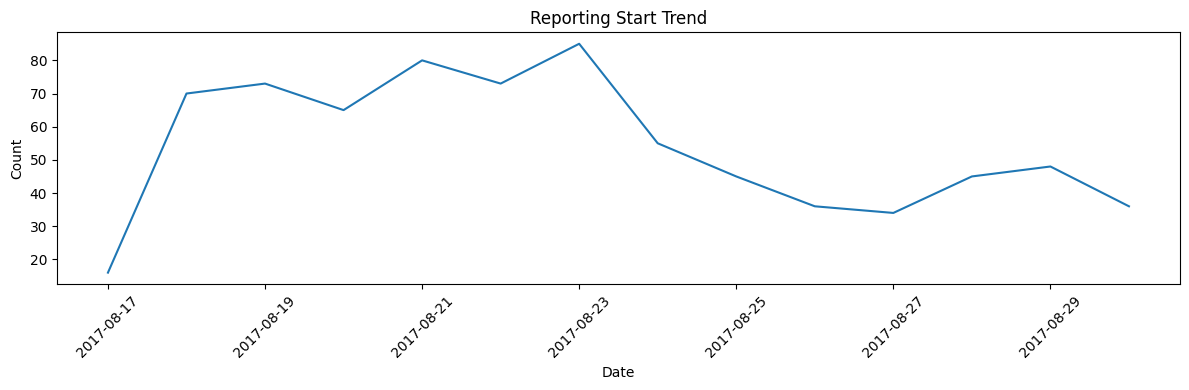

In [31]:
# 시작날짜별
start = df.groupby('reporting_start').size().reset_index(name='count')

plt.figure(figsize=(12, 4))
sns.lineplot(data=start, x='reporting_start', y='count')
plt.title('Reporting Start Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

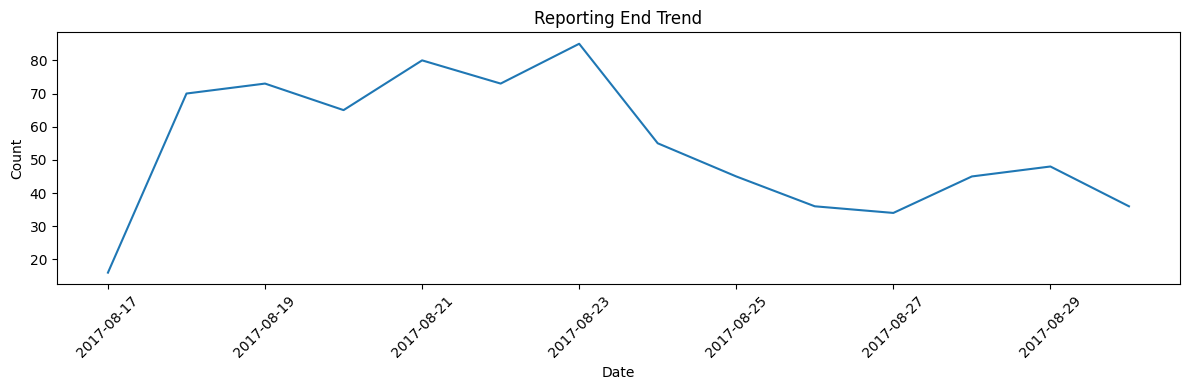

In [32]:
# 종료날짜별
end = df.groupby('reporting_end').size().reset_index(name='count')

plt.figure(figsize=(12, 4))
sns.lineplot(data=end, x='reporting_end', y='count')
plt.title('Reporting End Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 광고 게시 시작일과 종료일은 흐름이 같아 중요한 변수가 아닌 것으로 보인다

## 범주형 컬럼

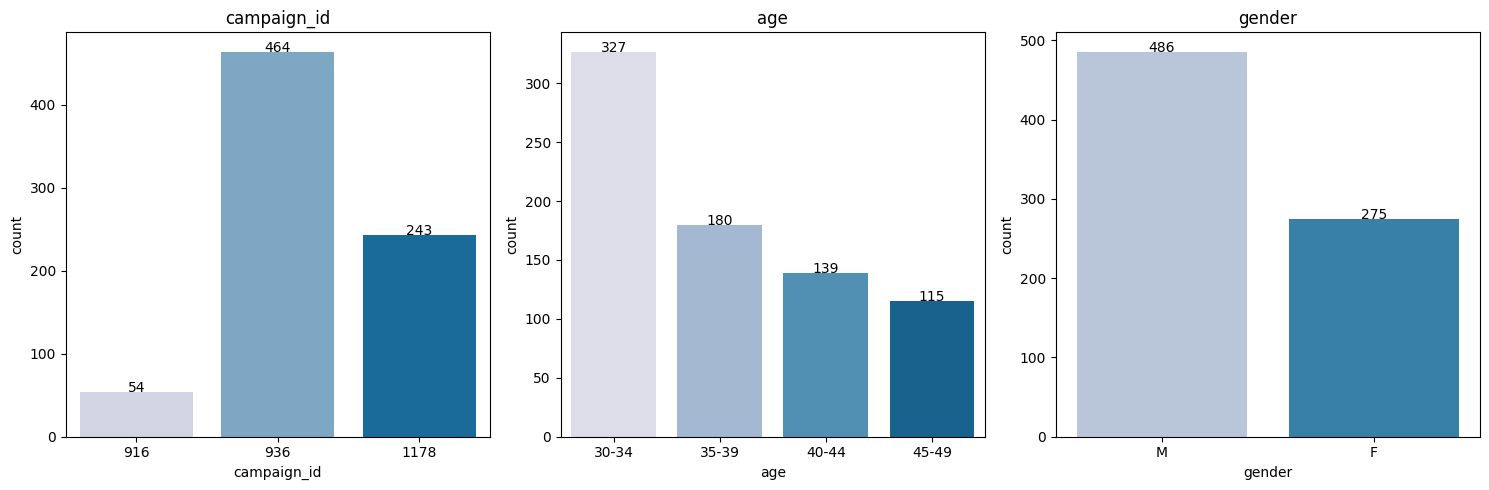

In [33]:
# 범주형 컬럼 시각화 1 (campaign_id, age, gender)
cat_col = ['campaign_id', 'age', 'gender']

fig, axes = plt.subplots(1, len(cat_col), figsize=(15, 5))

for ax, col in zip(axes, cat_col):
    sns.countplot(data=df, x=col, palette='PuBu', ax=ax)
    # count 값 표시
    for p in ax.patches:
        ax.text(p.get_x() + (p.get_width() / 2),  # 가로 위치
                p.get_y() + p.get_height(),       # 세로 위치
                f"{p.get_height():.0f}",          # 값 표시 (정수)
                ha='center')                      # 가운데 정렬
    ax.set_title(col)                             # 그래프 제목 설정

plt.tight_layout()
plt.show()

- campaign_id
    - 936(464회) > 1178(243회) > 916(54회) 순
- age
    - 30-34가 제일 많고 45-49가 제일 적음
- gender
    - 남성이 여성보다 약 1.7배 더 많음

In [34]:
# 486/275
# 1.7672727272727273

1.7672727272727273

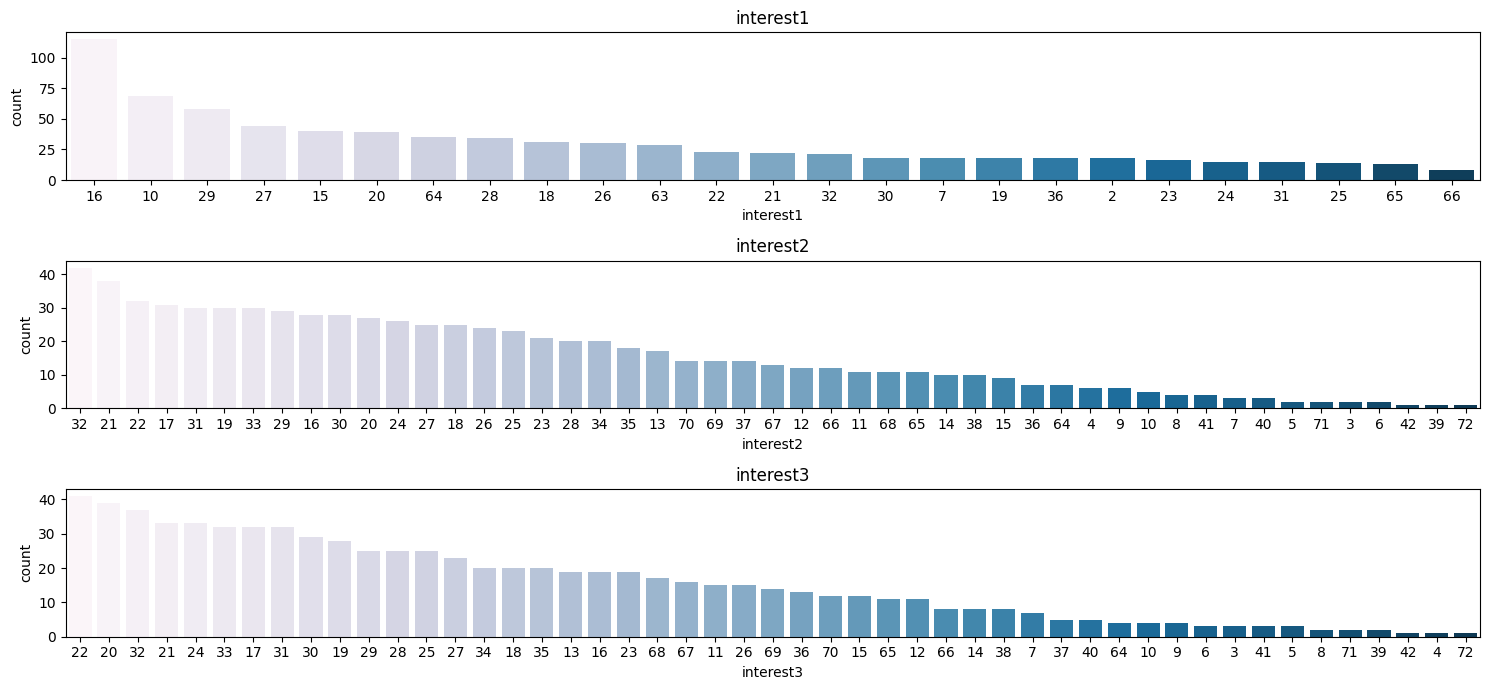

In [35]:
# 범주형 컬럼 시각화 2 (interest별 시각화)
interest_col = ['interest1', 'interest2', 'interest3']

fig, axes = plt.subplots(len(interest_col), 1, figsize=(15, 7))
for ax, col in zip(axes, interest_col):
    order = df[col].value_counts().index    # count 값이 높은 순으로 정렬
    sns.countplot(data=df, x=col, ax=ax, order=order, palette='PuBu')
    ax.set_title(col)

plt.tight_layout()
plt.show()

- 각 interest별 top 3
    - interest1: 16, 10, 29
    - interest2: 32, 21, 22
    - interest3: 22, 20, 32

## 연속형 컬럼

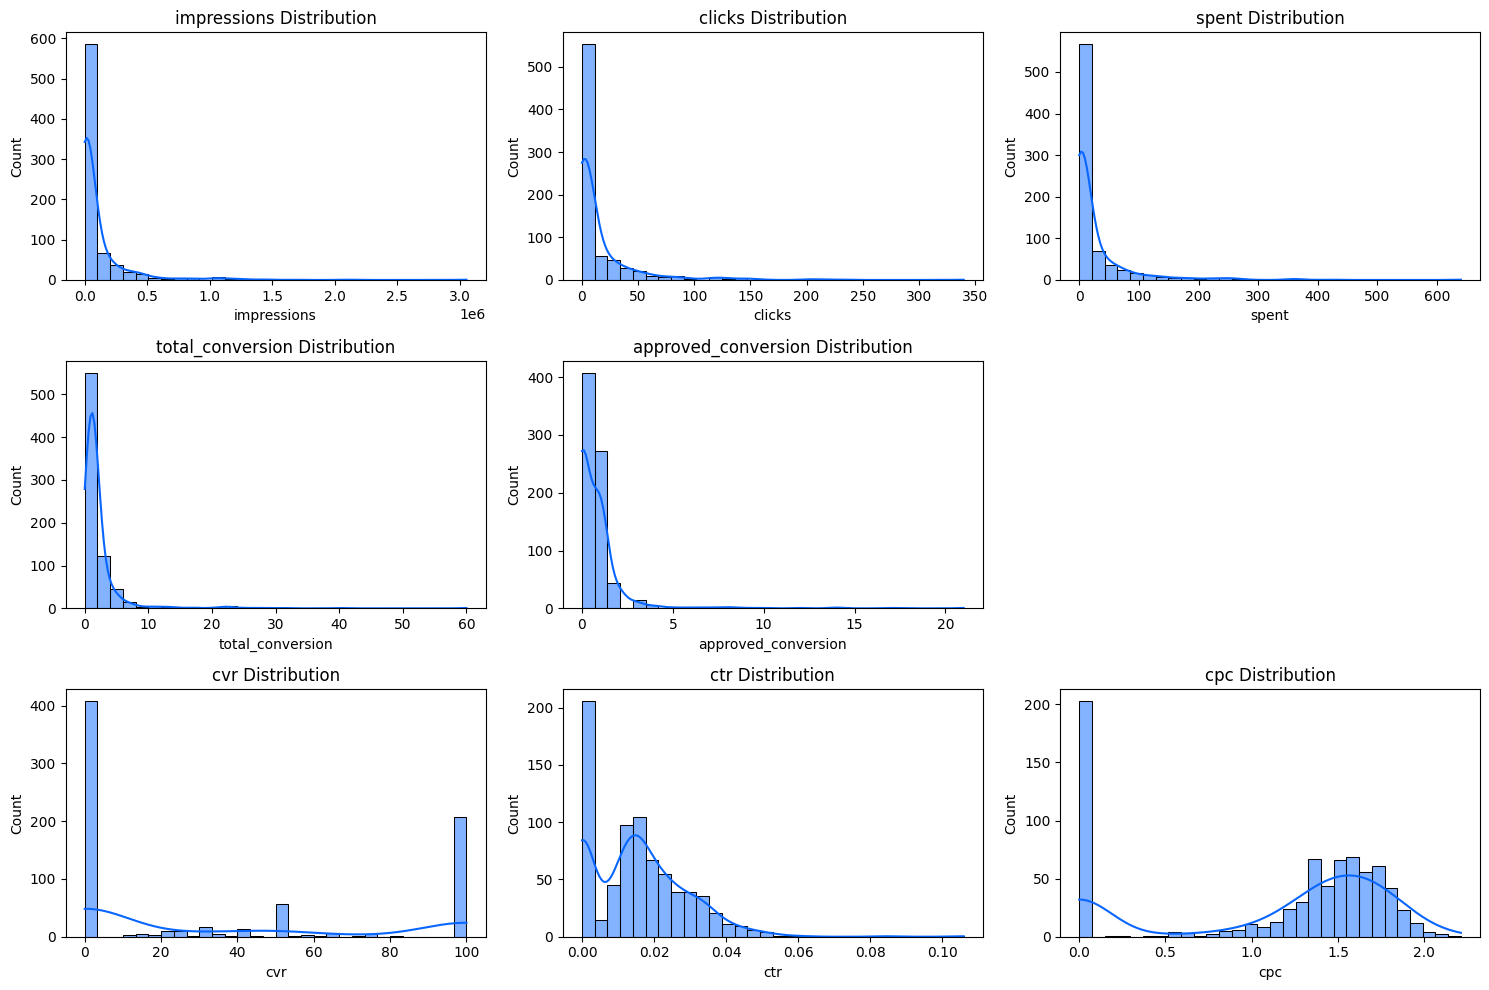

In [36]:
# 연속형 변수 시각화
cont_cols_grouped = [
    ['impressions', 'clicks', 'spent'],             # 1열
    ['total_conversion', 'approved_conversion'],    # 2열
    ['cvr', 'ctr', 'cpc']                           # 3열
]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, group in enumerate(cont_cols_grouped):
    for j, col in enumerate(group):
        ax = axes[i, j]
        sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color='#0866FF')
        ax.set_title(f"{col} Distribution")
        ax.set_ylabel('Count')
        ax.set_xlabel(col)

# 빈 칸 처리 (공백 및 테두리 제거)
for i in range(len(cont_cols_grouped)):            # 그룹 수만큼
    for j in range(len(cont_cols_grouped[i]), 3):  # 각 그룹의 나머지 칸
        axes[i, j].axis('off')                     # 테두리 제거

# 빈 행의 나머지 열 처리
for i in range(len(cont_cols_grouped), 3):   # 나머지 행들
    for j in range(3):                       # 모든 열
        axes[i, j].axis('off')               # 테두리 제거

plt.tight_layout()
plt.show()

- 연속형 컬럼 전체적으로 0에 치우친 값이 많다
- cvr: 0이 제일 많고 그다음 100이 많으며 전체적으로 불균형한 분포를 보인다, 평균의 함정이 발생할 가능성이 있다
- ctr: 0이 제일 많고 0.01~0.03에 많이 분포한다
- cpc: 1.25~1.75에 많이 분포한다

## campaign_id 와 비교

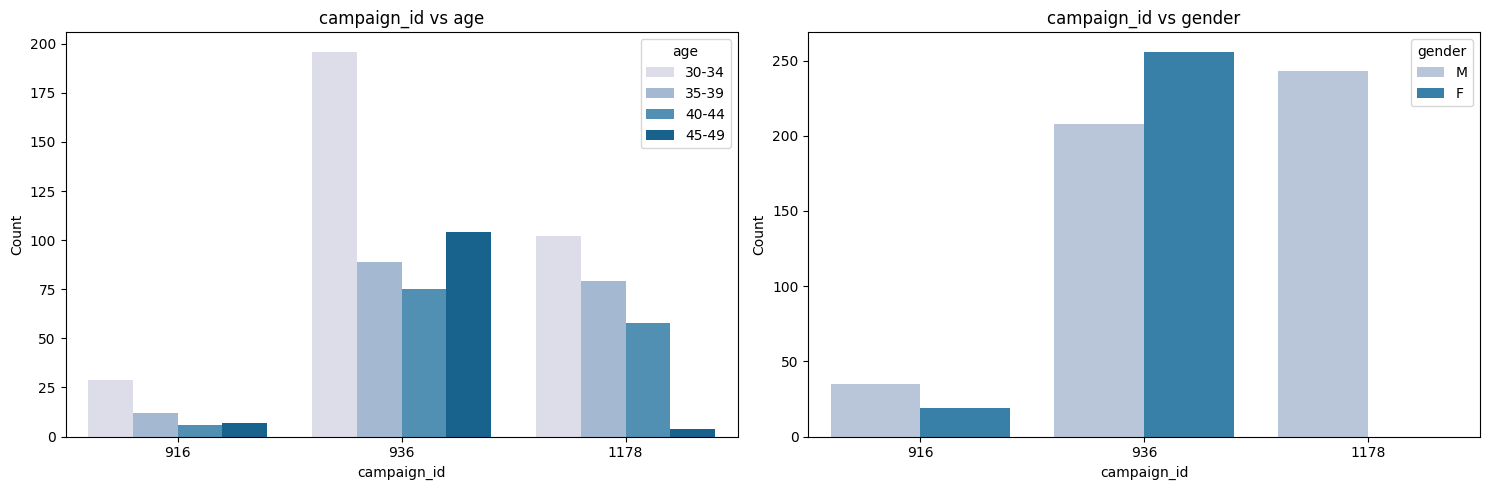

In [37]:
# 범주형 컬럼과 비교
cat_cols = ['age', 'gender']

fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 5))
for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df, x='campaign_id', hue=col, ax=ax, palette='PuBu')
    ax.set_title(f"campaign_id vs {col}")
    ax.set_xlabel('campaign_id')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

- vs age
    - 모든 campaign_id에서 30-34연령대가 가장 많다
    - 916, 936: 연령대가 높아질수록 수가 감소하다가 45-49에서 증가한다
    - 1178: 연령대가 높아질수록 수가 감소한다

- vs gender
    - 916: 남성이 여성보다 수가 많으나 각 count는 50을 넘지 않는다
    - 936: campaign_id 중에서 가장 수가 많고 여성이 남성보다 많다
    - 1178: 남성이 여성보다 압도적으로 많고 여성은 없는 것으로 보인다

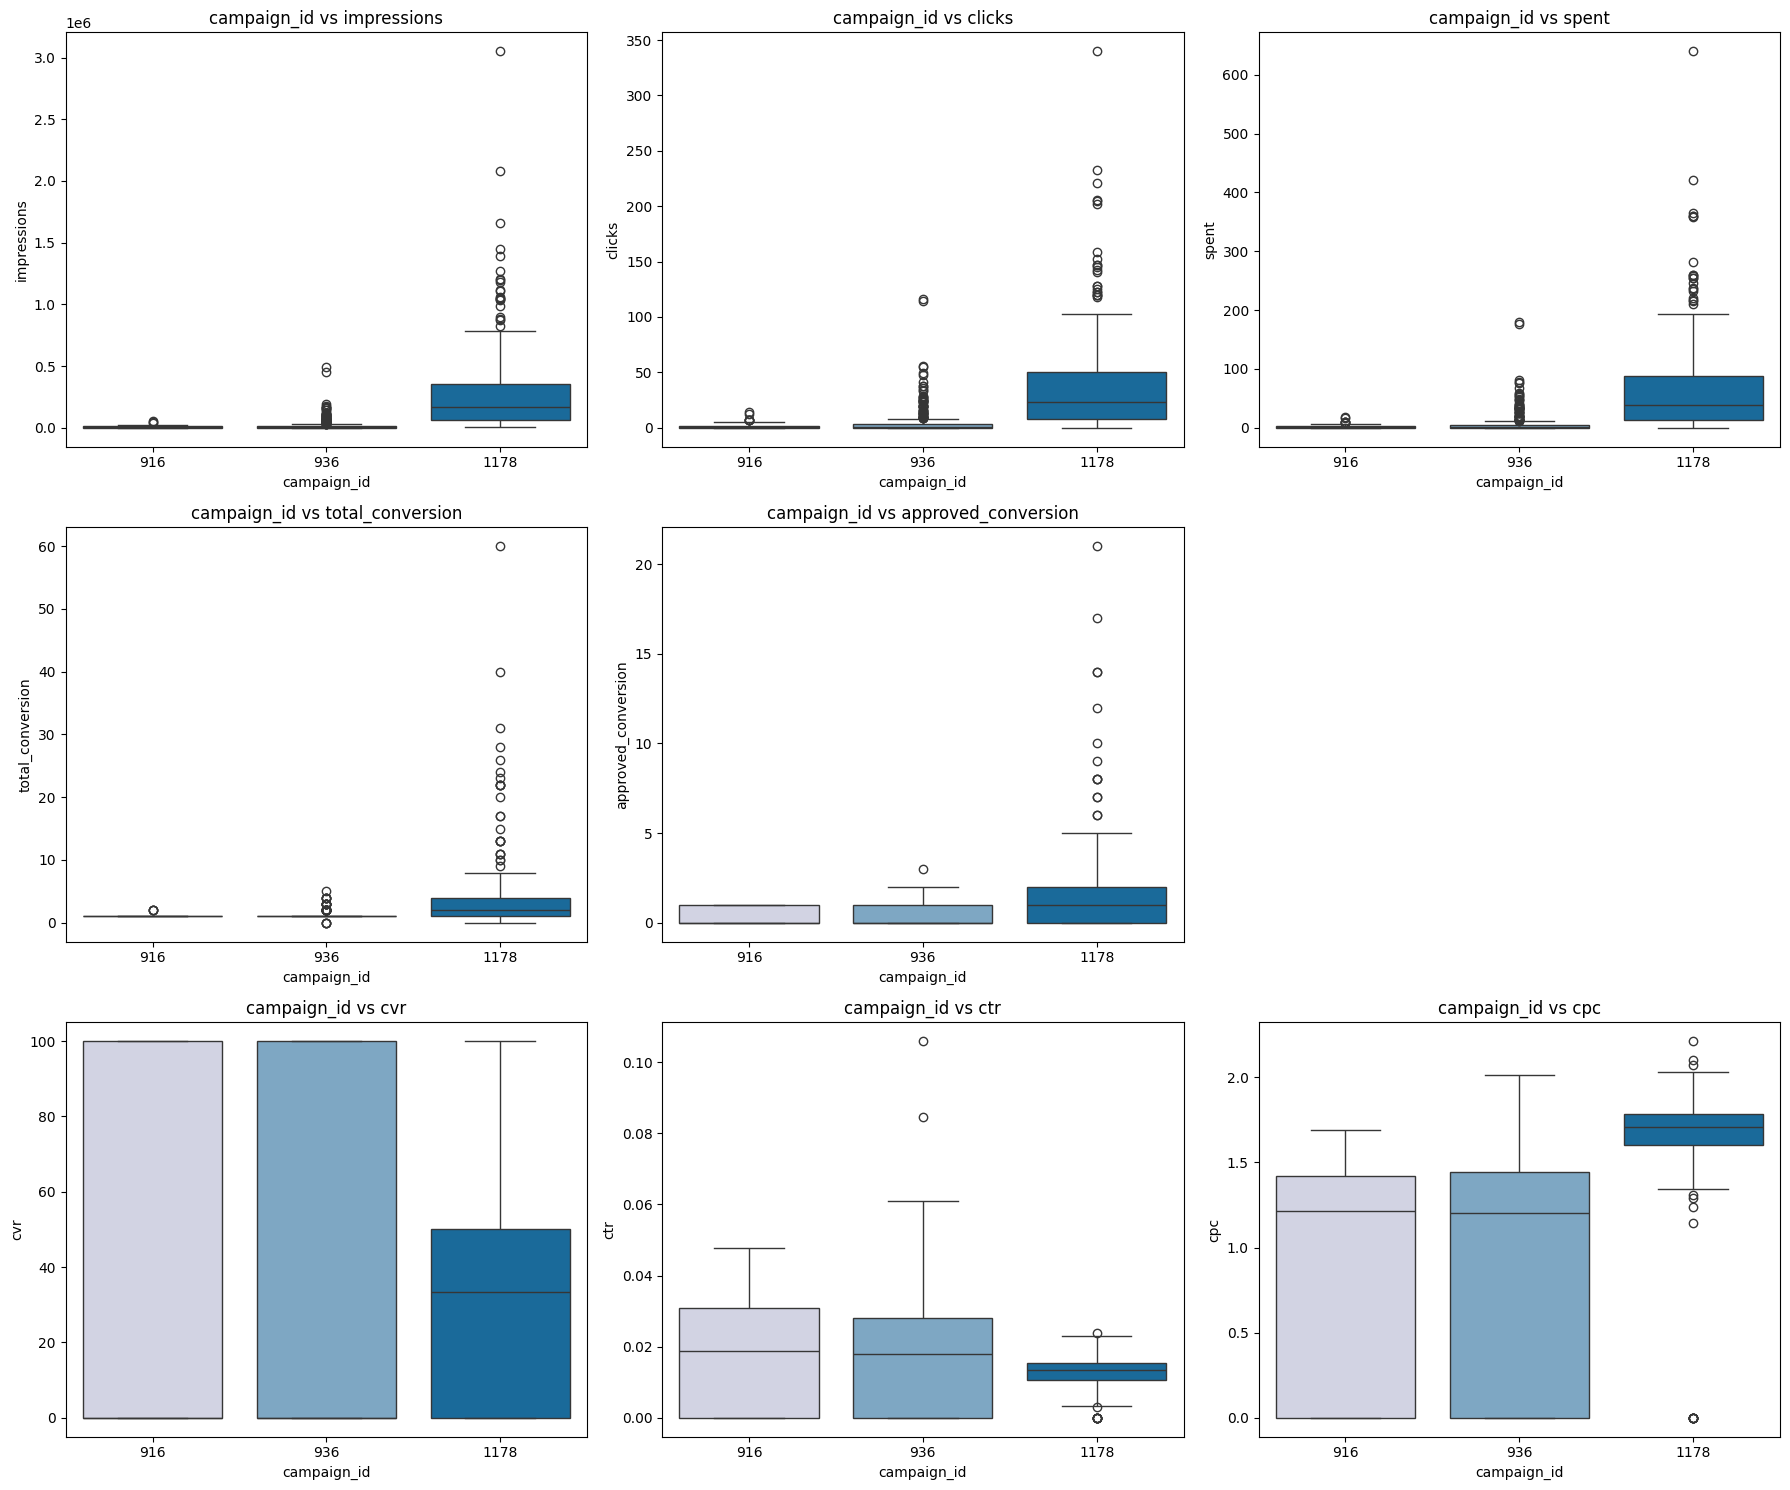

In [38]:
# 연속형 컬럼과 비교
cont_cols_grouped = [
    ['impressions', 'clicks', 'spent'],
    ['total_conversion', 'approved_conversion'],
    ['cvr', 'ctr', 'cpc']
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, group in enumerate(cont_cols_grouped):
    for j, col in enumerate(group):
        ax = axes[i, j]
        sns.boxplot(data=df, x='campaign_id', y=col, ax=ax, palette='PuBu')
        ax.set_title(f"campaign_id vs {col}")
        ax.set_xlabel('campaign_id')
        ax.set_ylabel(col)

# 빈 칸 처리 (공백 및 테두리 제거)
for i in range(len(cont_cols_grouped)):
    for j in range(len(cont_cols_grouped[i]), 3):
        axes[i, j].axis('off')

# 빈 행의 나머지 열 처리
for i in range(len(cont_cols_grouped), 3):
    for j in range(3):
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

- 916, 936
    - 936이 916보다 좀 더 넓은 분포를 보인다
    - vs total_conversion: 10회 미만
    - vs approved_conversion: 5회 미만, 주로 1~2회로 보인다
    - vs cvr: 0~100%
    - vs ctr: 0~0.03 위주로 분포
    - vs cpc: 1.25~1.50 위주로 분포

- 1178
    - vs total_conversion: 주로 10회 미만, 드물게 10회 이상도 존재하며 최대 60회 이상이다
    - vs approved_conversion: 주로 5회 미만, 드물게 5회 이상도 존재하며 최대 20회 이상이다
    - vs cvr: 0~50%, 최대 100%
    - vs ctr: 0~0.03 위주로 분포
    - vs cpc: 1.6~1.8 위주로 분포

## cvr, ctr, cpc 위주로 비교

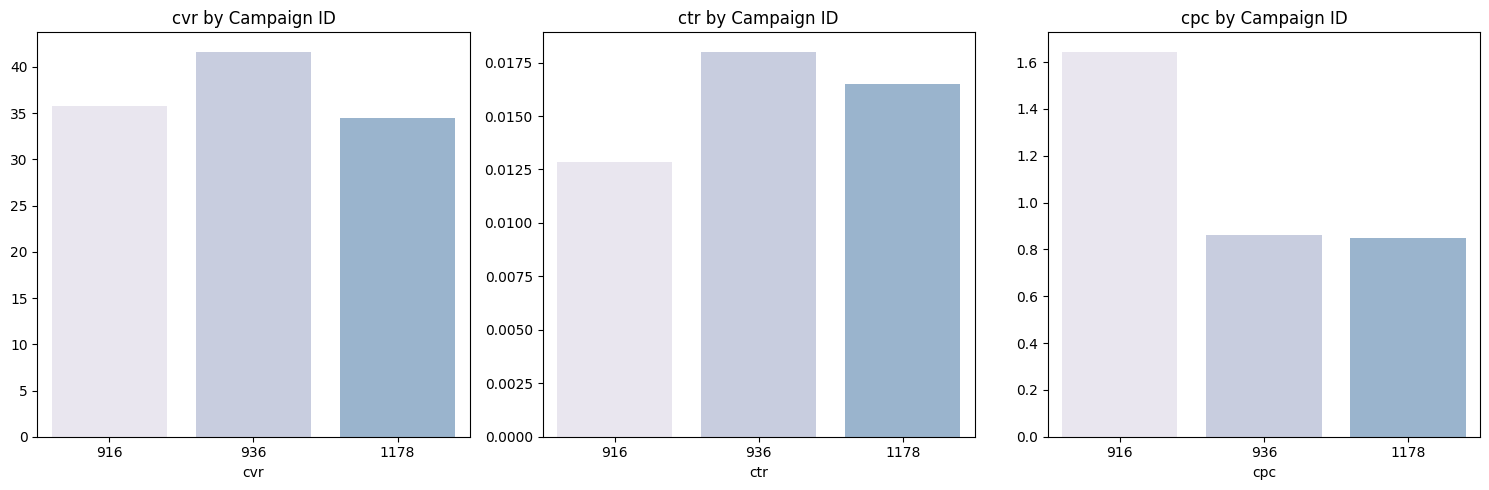

In [39]:
derived_var = ['cvr', 'ctr', 'cpc']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
palette = sns.color_palette("PuBu")

for i, col in enumerate(derived_var):
    sns.barplot(
        x=df["campaign_id"].unique(),
        y=df.groupby("campaign_id")[col].mean().values,
        ax=ax[i],
        palette=palette,
    )
    ax[i].set_title(f"{col} by Campaign ID")
    ax[i].set_xlabel(col)
    ax[i].tick_params(labelrotation=0)

plt.tight_layout()
plt.show()

- cvr: 936 > 916 > 1178 순으로 높음
- ctr: 936 > 1178 > 916 순으로 높음
- cpc: 916 > 936 > 1178 순으로 높음

## 상관계수

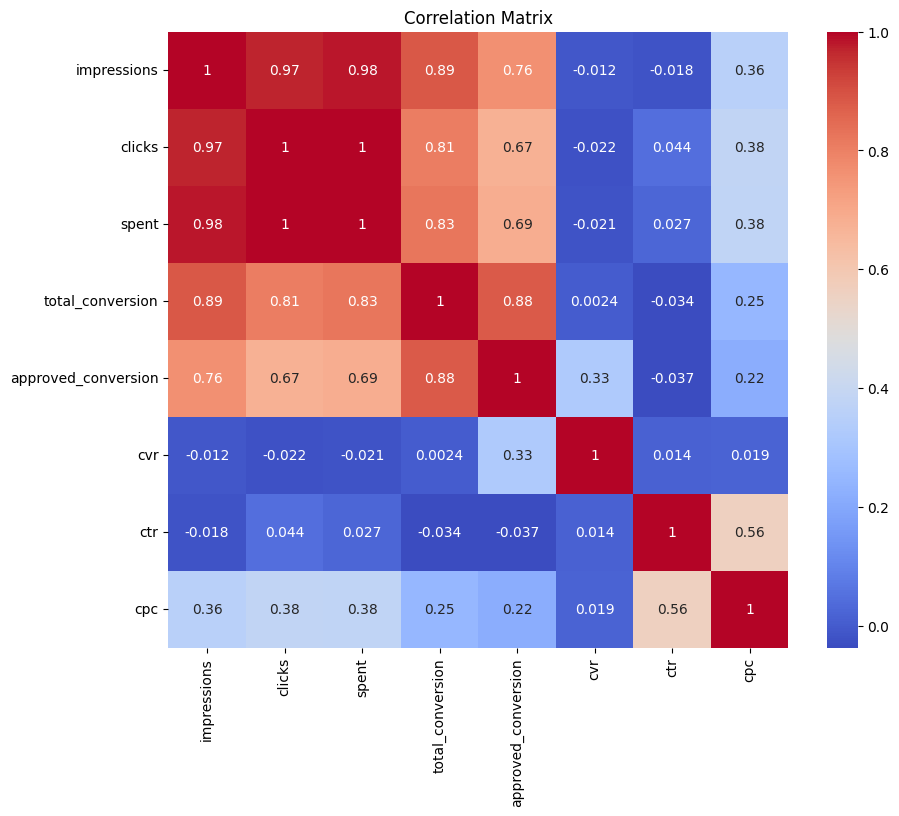

In [40]:
# 상관계수 시각화
corr = df.select_dtypes(include=np.number).corr()  # 숫자형 컬럼만 선택

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- 광고 예산을 많이 쓸수록 노출수가 많아지고
- 노출수가 많아질수록 클릭수, 총전환수, 실제전환수가 늘어난다

# Feature Importance 확인

## RandomForest 모델링

             Feature  Importance
3        impressions    0.216433
6                ctr    0.129817
2          interest3    0.123526
1          interest2    0.118754
7                cpc    0.109506
5              spent    0.080407
0          interest1    0.071947
4             clicks    0.033752
11         age_30-34    0.016890
16          gender_M    0.016332
12         age_35-39    0.016139
14         age_45-49    0.015580
13         age_40-44    0.015161
15          gender_F    0.014620
9    campaign_id_916    0.009603
10   campaign_id_936    0.008951
8   campaign_id_1178    0.002581


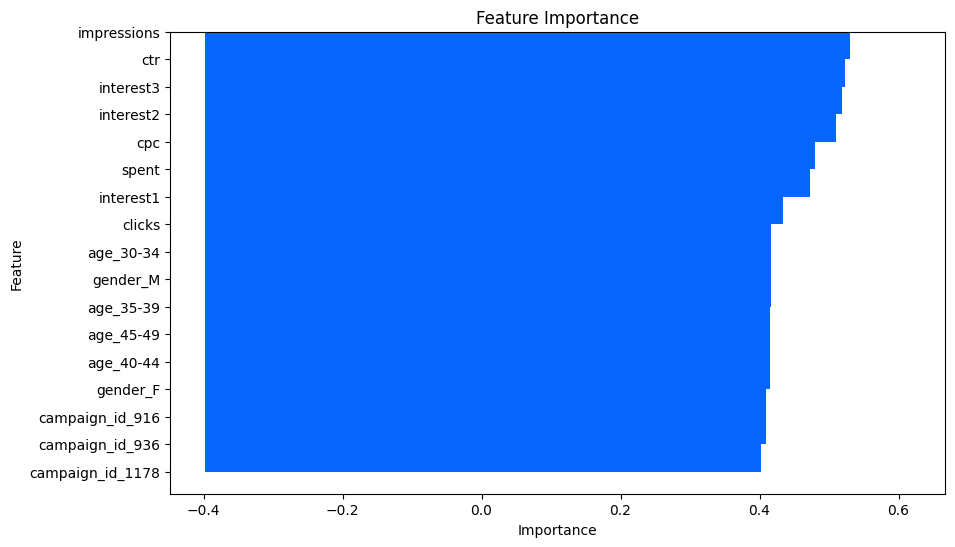

In [58]:
# 데이터 준비
X = df.drop(['ad_id', 'reporting_start', 'reporting_end', 'fb_campaign_id', 'total_conversion', 'approved_conversion', 'cvr'], axis=1)
X = pd.get_dummies(X, columns=['campaign_id', 'age', 'gender'], drop_first=False)
y = df['cvr']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = X.columns

# Feature Importance 데이터프레임 출력
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.bar(x = importances_df['Importance'], height = importances_df['Feature'], color = '#0866FF')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- 위와 같은 결과를 얻었지만 각 피처간의 값의 차이가 0.2 이내로 크지 않아서 변수간의 중요도 차이가 눈에 띄지 않는다
- RandomForest 모델링 만으로는 정확한 feature importance를 확인하기 어렵다고 판단하여
- SHAP 분석을 통해 feature importance를 확인해보았다

## SHAP 분석

In [66]:
# SHAP Explainer 생성
explainer = shap.explainers.TreeExplainer(model)

# 훈련 데이터와 테스트 데이터 결합 (전체 데이터 사용)
X_total = pd.concat([X_train, X_test])

# SHAP 값 계산
shap_values_total = explainer.shap_values(X_total)

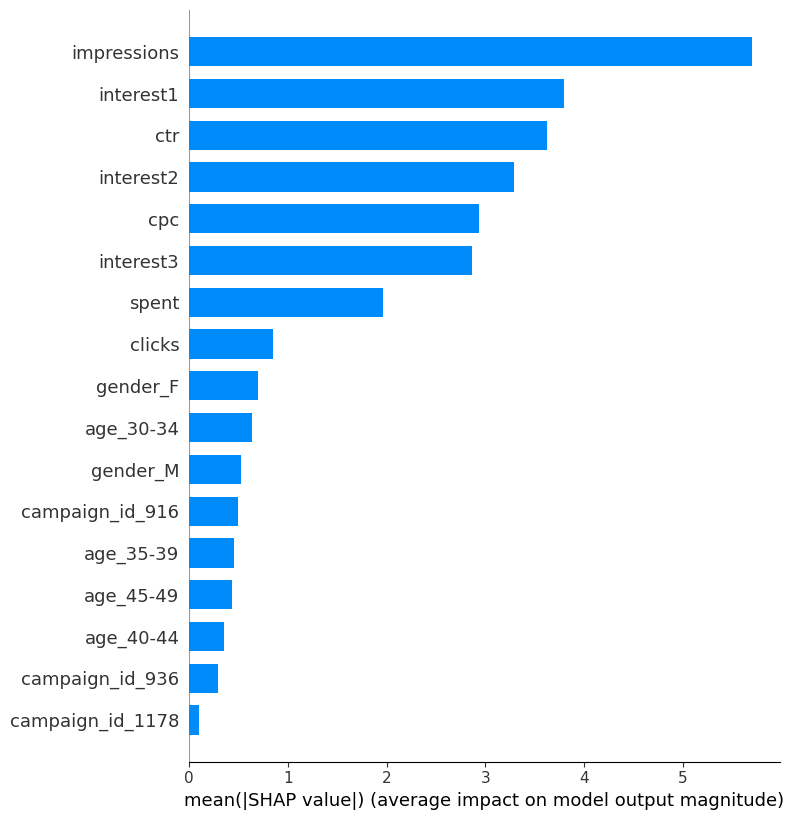

In [70]:
# 시각화 1. 바차트
shap.summary_plot(shap_values_total, X_total, plot_type='bar')

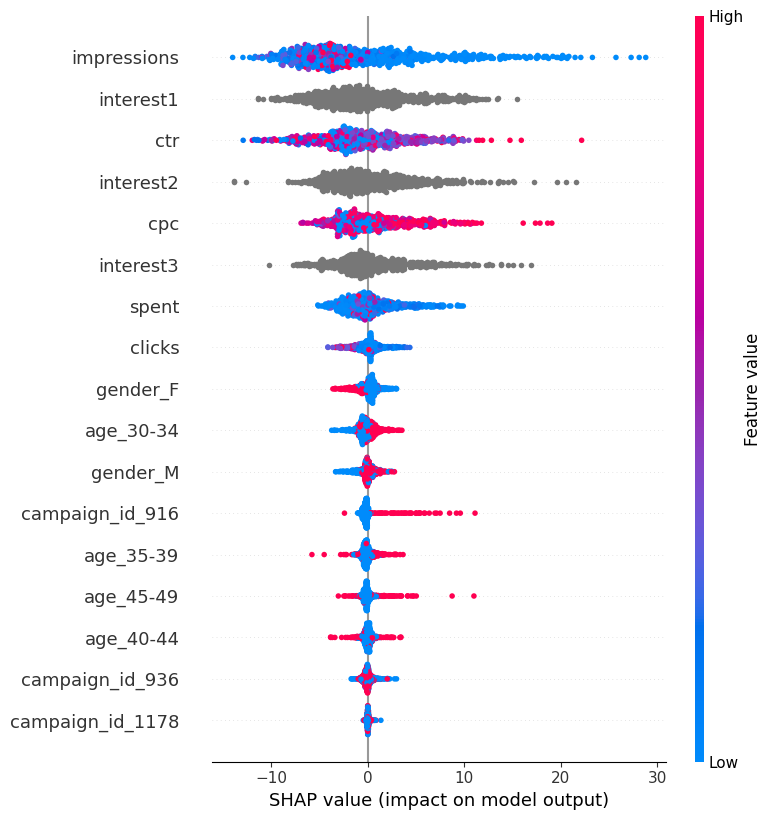

In [69]:
# 시각화 2. 점플롯
shap.summary_plot(shap_values_total, X_total)

- Feature Importance 상위 5개
    - impressions > interest 1 > ctr > interest 2 > cpc

- 범주형 피처 제외
   - impressions > ctr > cpc > spent > clicks

- 파생변수 제외
    - impressions > spent > clicks

- interest : 1> 2> 3
- gender : 여 > 남
    - Feature Importance의 차이가 크지 않다
    - 그러나 여성의 수가 남성의 수보다 더 적었음에도 중요도가 더 높다고 나온것에는 의미가 있을것으로 생각된다
- age : 30-34 > 35-39 > 45-49 > 40-44
    - 30대후반, 40대후반의 중요도는 크게 차이가 없긴하다
- campaign_id : 916 >936 >1178

# 요약

- 총 CVR, CTR, CPC
    - CVR: 35.36
    - CTR: 0.02
    - CPC: 1.1

- Feature Importance 확인 결과 전환률에 미치는 영향이 가장 높은 변수는 impression(노출수)이다
- 상관계수 확인 결과 노출수와 광고 예산(spent)의 상관계수는 0.98로 강한 양의 상관관계를 가진다
- 또한, 광고 예산을 더 쓸수록 노출수, 클릭수가 많아지고 전환률 상승으로 이어진다는 것을 확인했다
- 따라서 전환률을 높이려면 광고 예산을 많이 써야한다는 것을 알 수 있다
- 광고 예산을 투입할 때 고려할 주요 타겟
    - 흥미분야: interest 1 (그 중 16, 10 29에 해당하는 분야)
    - 성별: 여성
    - 연령대: 30대 초반 (30-34)
    - campaign_id: 916